In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats

In [140]:
import seaborn as sns
#sns.set()
sns.set(color_codes=True)

In [141]:
def gaussian(x, mean, stdev):
    return np.exp(-((x-mean)**2)/(2*stdev**2))/(np.sqrt(2*np.pi)*stdev)

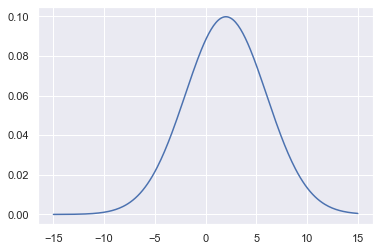

In [142]:
x = np.linspace(-15, 15, 250)
plt.plot(x, gaussian(x, 2, 4))

In [143]:
import scipy.integrate as integrate
print(integrate.quad(lambda x: gaussian(x, 0, 1), -1,1 ))

(0.682689492137086, 7.579375928402476e-15)


Text(0.5, 1.0, 'Area under the curve gives probability -- here 90% probability limits')

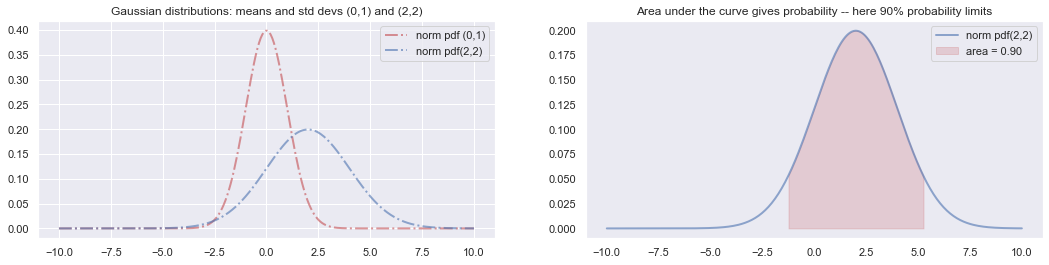

In [144]:
# create grid of 150 points from -3, 5
x = np.linspace(-10, 10, 250)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
ax[0].plot(x, stats.norm.pdf(x), 'r-.', lw=2, alpha=0.6, label='norm pdf (0,1)')
ax[0].plot(x, stats.norm.pdf(x, 2, 2), 'b-.', lw=2, alpha=0.6, label='norm pdf(2,2)')
ax[0].legend()
ax[0].set_title("Gaussian distributions: means and std devs (0,1) and (2,2)")
x_90_idx = (x > stats.norm.ppf(0.05, 2, 2)) & (x < stats.norm.ppf(0.95, 2, 2))
ax[1].grid(False)
ax[1].plot(x, stats.norm.pdf(x, 2, 2), 'b-', lw=2, alpha=0.6, label='norm pdf(2,2)')
ax[1].fill_between(x[x_90_idx], stats.norm.pdf(x[x_90_idx], 2, 2), color='r',alpha=.2, label='area = 0.90')
ax[1].legend()
ax[1].set_title("Area under the curve gives probability -- here 90% probability limits")

In [145]:
(x_lo, x_hi) = (stats.norm.ppf(0.05, 2, 2), stats.norm.ppf(0.95, 2, 2))
print("Range of x-values that account for 90% of probability of occurrence = (",x_lo, "," , x_hi, ")")
print("Confirm (by eye) that these values are at the limits of the domain of the function plotted above (right).")

Range of x-values that account for 90% of probability of occurrence = ( -1.2897072539029457 , 5.289707253902945 )
Confirm (by eye) that these values are at the limits of the domain of the function plotted above (right).


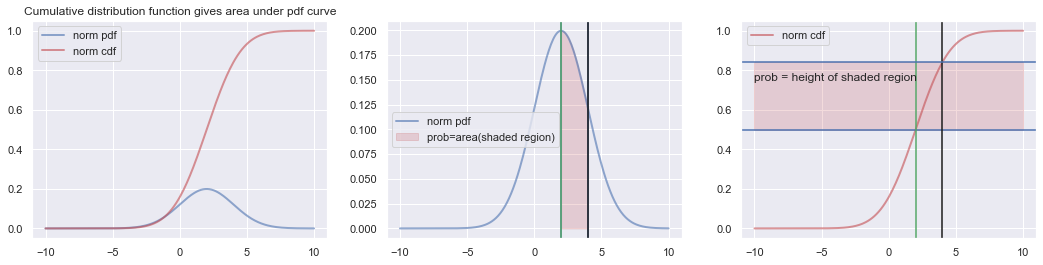

In [146]:
x = np.linspace(-10, 10, 250)
x1 = np.linspace(3, 4, 50)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
ax[0].plot(x, stats.norm.pdf(x, 2, 2), 'b-', lw=2, alpha=0.6, label='norm pdf')
ax[0].plot(x, stats.norm.cdf(x, 2, 2), 'r-', lw=2, alpha=0.6, label='norm cdf')
ax[0].set_title("Cumulative distribution function gives area under pdf curve")
ax[0].legend()
ax[1].plot(x, stats.norm.pdf(x, 2, 2), 'b-', lw=2, alpha=0.6, label='norm pdf')
x1 = np.linspace(2, 4, 50) # want to graphically
ax[1].axvline(2)
ax[1].axvline(4)
ax[1].fill_between(x1, stats.norm.pdf(x1, 2, 2), color='r', alpha=.2,label='prob=area(shaded region)')
ax[1].legend()
ax[2].plot(x, stats.norm.cdf(x, 2, 2), 'r-', lw=2, alpha=0.6, label='norm cdf')
# put vertical and horizontal lines at x=2, pdf(x=2)
ax[1].axvline(2, color = 'g')
ax[1].axvline(4, color = 'k')
y_2 = stats.norm.cdf(2,2,2)
ax[2].axhline(y_2)
# put vertical and horizontal lines at x=4, pdf(x=4)
ax[2].axvline(2, color = 'g')
ax[2].axvline(4, color = 'k')
y_4 = stats.norm.cdf(4,2,2)
ax[2].axhline(y_4)
ax[2].text(-10,.75,"prob = height of shaded region")
ax[2].fill_between(x, y_2, y_4, color='r', alpha=0.2)
ax[2].legend()

In [147]:
delta_xs = [0.1**i for i in range(10)]
for delta_x in delta_xs:
    print(stats.norm.pdf(3.,2,2)*delta_x - (stats.norm.cdf(3.+delta_x, 2, 2) - stats.norm.cdf(3, 2, 2)))

0.026150378587619955
0.00022541440057445572
2.205896692277203e-06
2.2009582686580544e-08
2.2004626755705442e-10
2.2003796248540395e-12
2.1918663767514547e-14
2.7118054282644494e-16
8.262920572069747e-17
3.046738106457288e-17


# Linear Regression from a Probabilistic Point of View


In [148]:
import numpy as np
import matplotlib.pyplot as plt

olympics100f=np.asarray([
0, 11.90,
1, 11.50,
2, 11.50,
3, 11.00,
4, 11.40,
5, 11.08,
6, 11.07,
7, 11.08,
8, 11.06,
9, 10.97,
10, 10.54,
11, 10.82,
12, 10.94,
13, 10.75,
14, 10.93,
15, 10.78,
16, 10.75,
17, 10.71])
odate_f = olympics100f[::2]
otime_f = olympics100f[1::2]

In [149]:
# fits the data using simple linear regression with 2 parameters
# returns w0 and w1
def linear_fit(X,y):
    num = (X*y).mean() - (X.mean()*y.mean())
    den = (X**2).mean() - (X.mean())**2
    w1 = num/den
    w0 = y.mean() - w1*X.mean()
    return w0, w1
w0fit, w1fit = linear_fit(odate_f, otime_f)

In [150]:
# returns the gradient of the * data_point
def learnt_fn(Xvariable, Xdata, ydata):
    X = Xvariable
    w_hat = linear_fit(Xdata, ydata) 
    fn = 0
    
    for i in range(len(w_hat)):
        fn += w_hat[i]*X**i
    return fn

11.494210526315785 -0.05304437564499428


Text(0.5, 1.0, 'The data that the learnt function produces does not look like the real data')

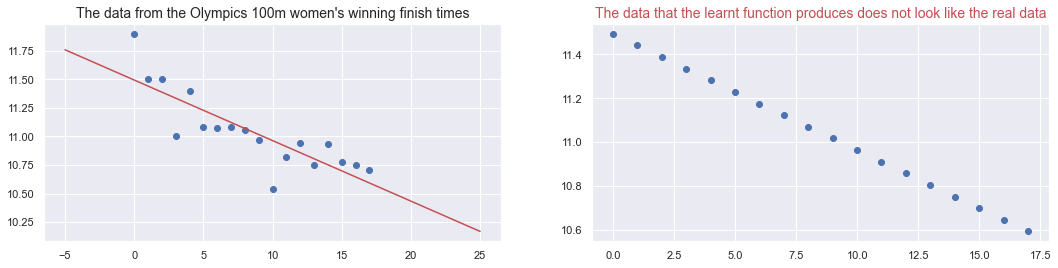

In [151]:
print(w0fit, w1fit) # prits best weights 
x = np.linspace(-5, 25, 250)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
ax[0].scatter(odate_f, otime_f) # plots the 100m data 
ax[0].plot(x, learnt_fn(x, odate_f, otime_f), c='r')
ax[0].set_title("The data from the Olympics 100m women's winning finish times",fontsize=14)
ax[1].scatter(odate_f, learnt_fn(odate_f, odate_f, otime_f) )
ax[1].set_title("The data that the learnt function produces does not look like the real data", fontsize=14, color='r')

In [152]:
def negloglik_normal(X, y, w0, w, sigma):
        loglik = 0 # NOTE: this has been corrected
        for x1, y1 in zip(X, y):
            prediction1 = w0 + np.dot(w, x1)
            residual = y1 - prediction1
            loglik += np.log(stats.norm.pdf(residual, 0, sigma)) # computes log(probability of residual) assuming gaussian
        return -loglik

In [153]:
# This prints out the trial weights followed by the loglikelihood that they are able to reproduce the training data

w0best, w1best = linear_fit(odate_f, otime_f) # linear regression fit
w_trial = np.array([[12.0, -.1], [11.5, -.03], [12.5, -.03], [11.0,-.07], [w0best, w1best]])
for w0, w1 in w_trial:
    nll = negloglik_normal(odate_f, otime_f, w0, w1, .05)
    print((w0,w1), nll)

(12.0, -0.1) 338.2577126737121
(11.5, -0.03) 281.5177126737122
(12.5, -0.03) 5333.517712673712
(11.0, -0.07) 1578.3977126737134
(11.494210526315785, -0.05304437564499428) 83.64962185843893


## Generative model: making the model produce outputs that "look like" the original data 


In [154]:
residuals_f = learnt_fn(odate_f, odate_f, otime_f)-otime_f

In [155]:
print("Verifying conditions for vanishing of gradient of loss:\nSum of the residuals = ", residuals_f.sum())

Verifying conditions for vanishing of gradient of loss:
Sum of the residuals =  -3.552713678800501e-15


In [156]:
print("Sum of product(residual times input): r_n times x_n = ", odate_f.dot(residuals_f))

Sum of product(residual times input): r_n times x_n =  2.4158453015843406e-13


Text(0.5, 1.0, "Histogram of the residuals (women's)")

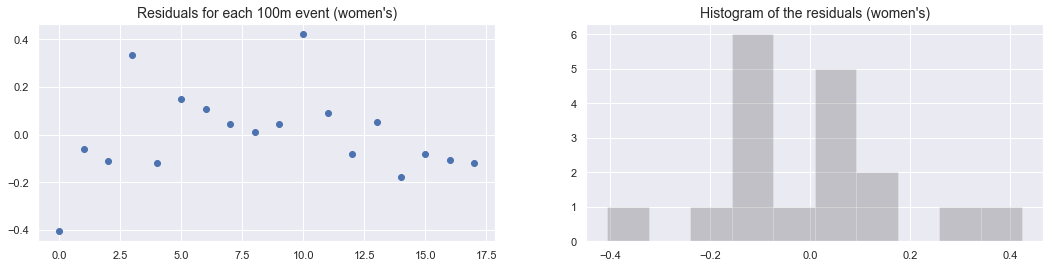

In [157]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
ax[0].scatter(odate_f, residuals_f)
ax[0].set_title("Residuals for each 100m event (women's)", fontsize = 14)
ax[1].hist(residuals_f, color='k',alpha=0.2)
ax[1].set_title("Histogram of the residuals (women's)", fontsize = 14)

### We need to capture the distribution of the residuals to include in our model 

Text(0.5, 1.0, "Women's 100m: histogram of residuals and gaussian pdf with same std. dev.")

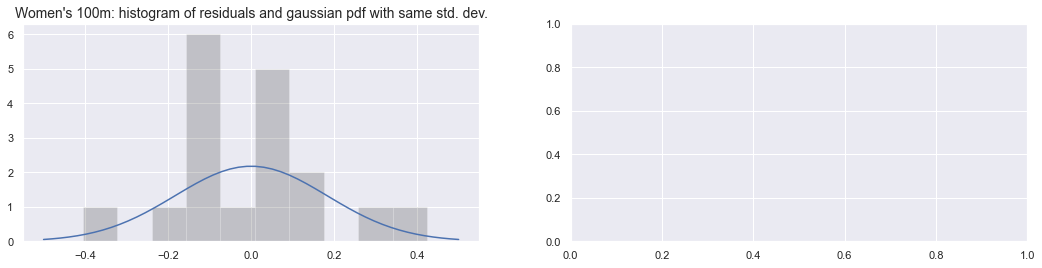

In [158]:
res_sigma_f = np.sqrt(np.square(residuals_f).sum()/len(residuals_f)) # standard deviation of residual
x = np.linspace(-0.5,0.5,50)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
ax[0].plot(x, stats.norm.pdf(x, 0, res_sigma_f), 'b-')
ax[0].hist(residuals_f,color='k',alpha=0.2)
ax[0].set_title("Women's 100m: histogram of residuals and gaussian pdf with same std. dev.", fontsize = 14)

# For completeness do the same for the 100m data for the men's event
# you will need to define:
# residuals_m = (prediction-from-model - otime_m)
# compute the standard deviation and plot a gaussian distribution over the histograms

### effect of noise on parameter estimates 


In [159]:
def data_generator(n):
    # np.random.seed(seed)
    noise = np.random.normal(0, 1, n)
    x = np.linspace(0, 1, n)
    y = -2 + 3*x + noise
    return x, y

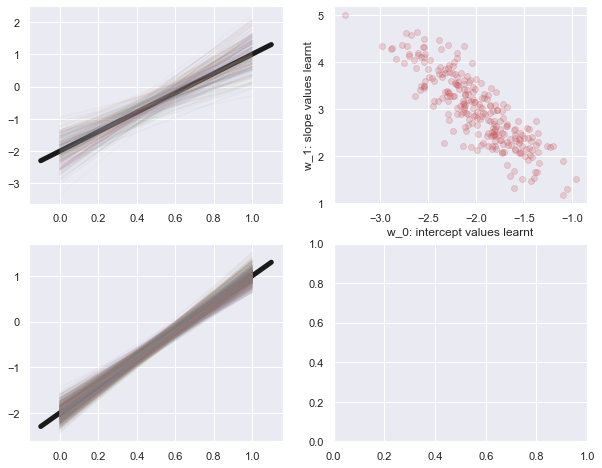

In [160]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))
# define a slightly bigger domain for the plotting of the TRUE underlying deterministic function
X0 = np.linspace(-0.1,1.1,100)
ax[0][0].plot(X0, -2+3*X0, lw = 5, c='k') # lw sets line weight, here a heavy line


X = np.linspace(0,1,100)
l_wts1 = []
l_sig1 = []
for i in range(250): # 1000 data fitting operations
    Xd, yd = data_generator(20) # generate a training sample of SIZE 20
    best_fit_w = linear_fit(Xd, yd)
    residuals_w = learnt_fn(Xd, Xd, yd)-yd
    best_fit_sigma = np.sqrt(np.square(residuals_w).sum()/len(residuals_w))
    l_wts1.append(np.asarray(best_fit_w))
    l_sig1.append(best_fit_sigma)
    ax[0][0].plot(X, learnt_fn(X, Xd, yd), alpha=0.05) # plot light lines (set by alpha, the transparency parameter)

l_wts1 = np.asarray(l_wts1)
ax[0][1].scatter(l_wts1[:,0], l_wts1[:,1], alpha=0.2, c='r')
ax[0][1].set_xlabel('w_0: intercept values learnt')
ax[0][1].set_ylabel('w_1: slope values learnt')

ax[1][0].plot(X0, -2+3*X0, lw = 5, c='k')
l_wts2 = []
l_sig2 = []
for i in range(1000): # 1000 data fitting operations
    Xd, yd = data_generator(180) # generate a training sample of SIZE 180
    best_fit_w = linear_fit(Xd, yd)
    residuals_w = learnt_fn(Xd, Xd, yd)-yd
    best_fit_sigma = np.sqrt(np.square(residuals_w).sum()/len(residuals_w))
    l_wts2.append(np.asarray(best_fit_w))
    l_sig2.append(best_fit_sigma)
    ax[1][0].plot(X, learnt_fn(X, Xd, yd), alpha=0.05) # plot light lines (set by alpha the transparence, parameter)


# My turn 
Apart from the weights, we have also learnt the best-fit standard deviations, sigma stored in the
lists l_sig1 and l_sig2. What do they look like? What use are they in making the model generate
data that looks like realistic data, unlike the best fit line, as we saw earlier?



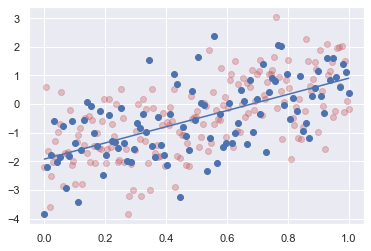

In [161]:
# we can use the standard deviation learn't from the residuals along with our model to  
# generate more realistic data. The model is used to create the mean (deterministic part)
# and the standard deviation to create the distribution modelling the noise.

# The blue is the data generated from the distribution learned form the data. 

Xd, yd = data_generator(180) # generate a training sample of SIZE 180
best_fit_w = linear_fit(Xd, yd)
residuals_w = learnt_fn(Xd, Xd, yd)-yd
best_fit_sigma = np.sqrt(np.square(residuals_w).sum()/len(residuals_w))
plt.plot(X, learnt_fn(X, Xd, yd), alpha=1.0) # plot light lines (set by alpha the transparence, parameter)
plt.scatter(Xd, yd, c='r', alpha=0.3)

noise = []
for i in range(100):
    random_res = np.random.normal(0, best_fit_sigma)
    noise.append(random_res)

plt.scatter(X, learnt_fn(X, Xd, yd) + noise, alpha=1.0)

# Bayesian Inference

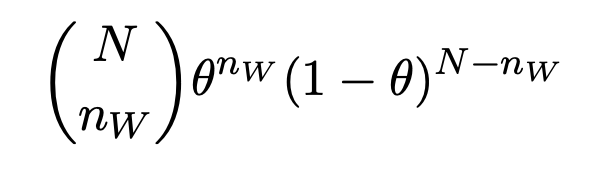

In [162]:

# P(theta) is the unknown proportion of water to land. 
# n_w is the number of trials when the globe is thrown up and then lands on the water 
# N is the number of trials

def posterior_grid_approx(grid_points, success, tosses):
    # define grid: introduce points theta
    # posterior probability, p(theta) is returned
    p_grid = np.linspace(0, 1, grid_points)
    # define prior
    prior = np.repeat(1, grid_points)/grid_points # a uniform prior
    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior
    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior


In [163]:
def bin(x, n, k):
    return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))*(x**k)*(1-x)**(n-k)

In [164]:
point_grid = np.linspace(0, 1, 6) # an array of 6 points [0.,0.2,0.4,0.6,0.8,1.]
print("Check if we understand what stats.binom.pmf returns. Are the following two lines equal?")
print(bin(point_grid,10,7))
print(stats.binom.pmf(7, 10, point_grid))

Check if we understand what stats.binom.pmf returns. Are the following two lines equal?
[0.         0.00078643 0.04246733 0.21499085 0.20132659 0.        ]
[0.         0.00078643 0.04246733 0.21499085 0.20132659 0.        ]


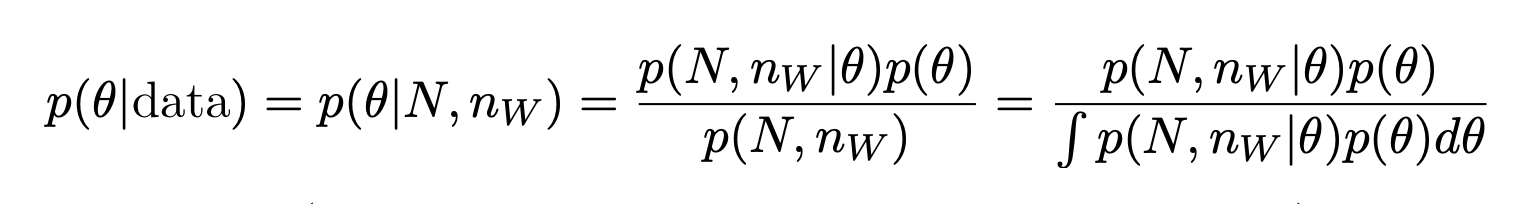

Max of posterior probability is at the 5-th entry
 with trial parameter theta equal to 1.0and p(1.0)=0.762


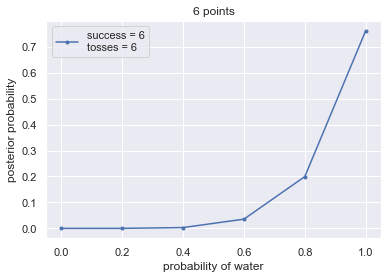

In [165]:
# the posterior probability here is the fraction of water covering the globe 
# the likelihood is how likely it is that each through will land on water given the fraction 
# the prior is the probability of the fraction of water taking a value 

points = 6
w= 6
n = 6 # the number of times it landed on water was 6 and there was 6 tosses 
p_grid, posterior = posterior_grid_approx(points, w, n) 
plt.plot(p_grid, posterior, '.-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water')
plt.ylabel('posterior probability')
plt.title('{} points'.format(points))
plt.legend(loc=0);
print('Max of posterior probability is at the {}-th entry\n with trial parameter theta equal to {}\
and p({})={}'.format(np.argmax(posterior),p_grid[np.argmax(posterior)],
p_grid[np.argmax(posterior)],np.around(np.max(posterior),3)))

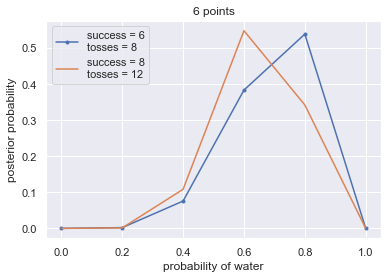

In [166]:
points = 6
w, n = 6, 8
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior,'.-', label='success = {}\ntosses = {}'.format(w, n))
w, n = 8, 12
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior, '-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water')
plt.ylabel('posterior probability')
plt.title('{} points'.format(points))
plt.legend(loc=0);

In [167]:
def posterior_grid_from_prior(prior, success, tosses):
    # define grid: introduce points theta
    # posterior probability, p(theta) is returned
    grid_points = len(prior)
    p_grid = np.linspace(0, 1, grid_points)
    # define prior
    prior = prior
    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior
    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

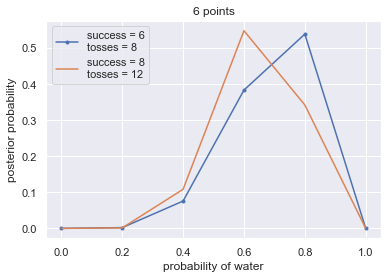

In [168]:
points = 6
w, n = 6, 8
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior,'.-', label='success = {}\ntosses = {}'.format(w, n))
wnew, nnew = 2, 4 # 2 additional successes from 4 tosses of the globe
p_grid, posterior = posterior_grid_from_prior(posterior, wnew, nnew)
[w, n] = [w+wnew, n+nnew]
plt.plot(p_grid, posterior, '-', label='success = {}\ntosses = {}'.format(w,n)) # updating total counts
plt.xlabel('probability of water')
plt.ylabel('posterior probability')
plt.title('{} points'.format(points))
plt.legend(loc=0);

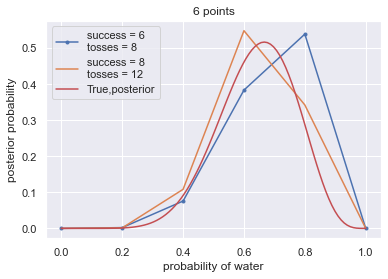

In [169]:
points = 6
w, n = 6, 8
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior,'.-', label='success = {}\ntosses = {}'.format(w, n))
wnew, nnew = 2, 4 # 2 additional successes from 4 tosses of the globe
p_grid, posterior = posterior_grid_from_prior(posterior, wnew, nnew)
[w, n] = [w+wnew, n+nnew]
plt.plot(p_grid, posterior, '-', label='success = {}\ntosses = {}'.format(w,n)) # updating total counts
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x , w+1, n-w+1)/len(p_grid), c='r', label='True,posterior')
plt.xlabel('probability of water')
plt.ylabel('posterior probability')
plt.title('{} points'.format(points))
plt.legend(loc=0);

## Generative Model: Sampling from the posterior 

In [170]:
p_grid, posterior = posterior_grid_approx(grid_points=10, success=7, tosses=12)
nsamples = 100 # The next line returns nsample data points (an observation of a,value of $\theta$)
samples = np.random.choice(p_grid, p=posterior, size=int(nsamples),replace=True)

<AxesSubplot:>

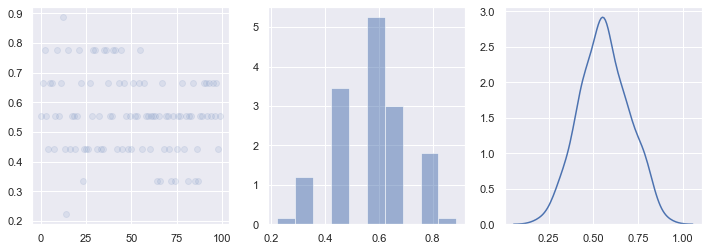

In [171]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].plot(samples, 'o', alpha=0.1)
ax[1].hist(samples,alpha=.5,density=True)
sns.kdeplot(samples, ax=ax[2])

# Your turn 
You should now be in a position to appreciate and understand Chapter 3 of Rogers-Girolami, FCML.
You assume some prior distribution P(w) for the weights of the regression task y = f(x; w). When you encounter the evidence – the dataset of (xn, yn) pairs, you have to update your belief on the
distribution of parameters w. You do this by using Bayes’ rule

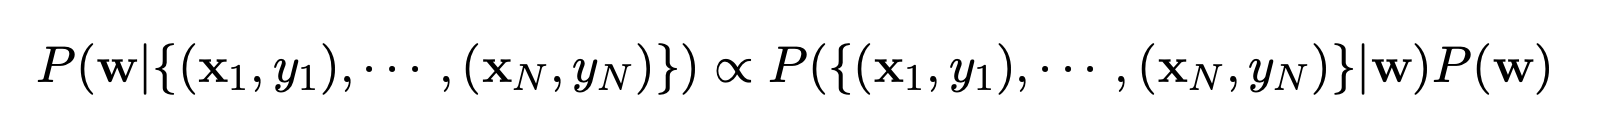

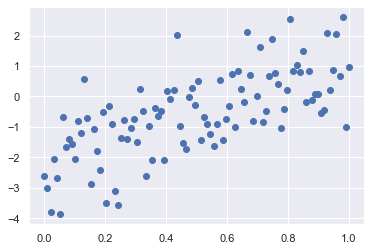

In [172]:
xd, yd = data_generator(100)
plt.scatter(xd, yd)

In [173]:
def gaussian(x, mean, stdev):
    return np.exp(-((x-mean)**2)/(2*stdev**2))/(np.sqrt(2*np.pi)*stdev)

In [174]:
weights = linear_fit(xd, yd)
bias = np.ones(100)
X = np.column_stack((bias, xd))
W = np.array([weights[0], weights[1]])

In [175]:
# Create a placeholder for the likelihood probability that the data point could have been pulled from
# the model's distribution 
likelihood = np.zeros((len(X), 1))
likelihood.shape

(100, 1)

In [192]:
# Likelihood means 
means = np.dot(X,W)

In [193]:
# Calculate the probability that the datapoint belongs to the distribution made using your model
for i in range(len(xd)): 
    likelihood[i] = gaussian(xd[i], means[i], 0.5)

In [201]:
# Assume the weights prior distribution 
# treat each weight as independent and find the probability that your weights could have come 
# from the prior belief distribution
prior = gaussian(W[0], 3.0, 1.0) * gaussian(W[1], 3.0, 1.0)


In [202]:
# calculate posterior which is the probability that given the the data
# your weights are. 
posteriorw0 = (likelihood * prior)/likelihood.sum()


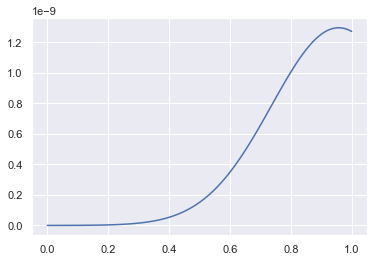

In [205]:
plt.plot(xd, posterior)
